https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORT THE DATSET

In [2]:
df = pd.read_csv("IRIS.csv")
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

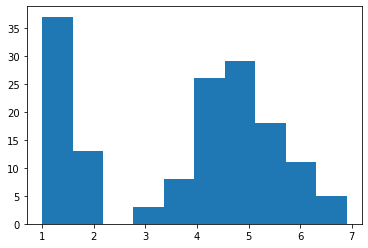

In [4]:
_ = plt.hist(df["petal_length"])

## Using Seaborn style and setting figsize

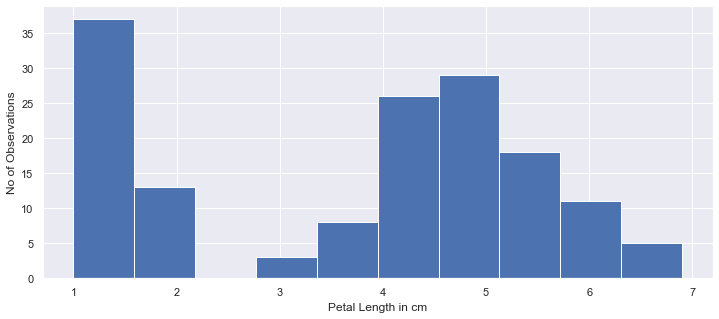

In [5]:
sns.set(rc={'figure.figsize':(12,5)})
_ = plt.hist(df["petal_length"])
_ = plt.xlabel("Petal Length in cm")
_ = plt.ylabel("No of Observations")

In [6]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

## Exploring Versicolor Data only

In [8]:
versicolor_petal_len = df[df["species"] == 'Iris-versicolor']["petal_length"]

# Setting Bin size

In [9]:
num_bins = int(np.sqrt(len("versicolor_petal_len")))

In [10]:
num_bins

4

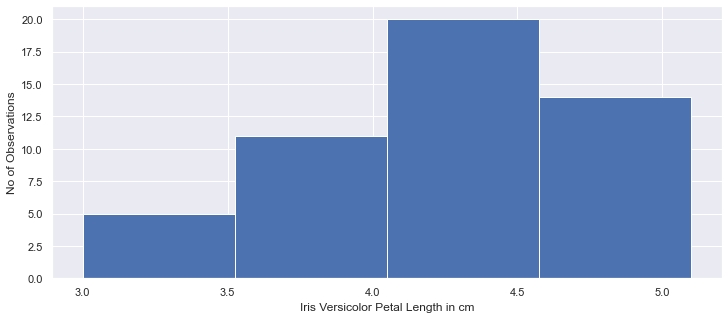

In [11]:
_ = plt.hist(versicolor_petal_len, bins =num_bins)
_ = plt.xlabel("Iris Versicolor Petal Length in cm")
_ = plt.ylabel("No of Observations")

# Swarm Plot 

-  a type of scatter plot that is used for representing categorical values
- similar to the strip plot, but it avoids the overlapping of points
- plots the actual data instead of frequency distribution like histogram
- removes the "binning bias"

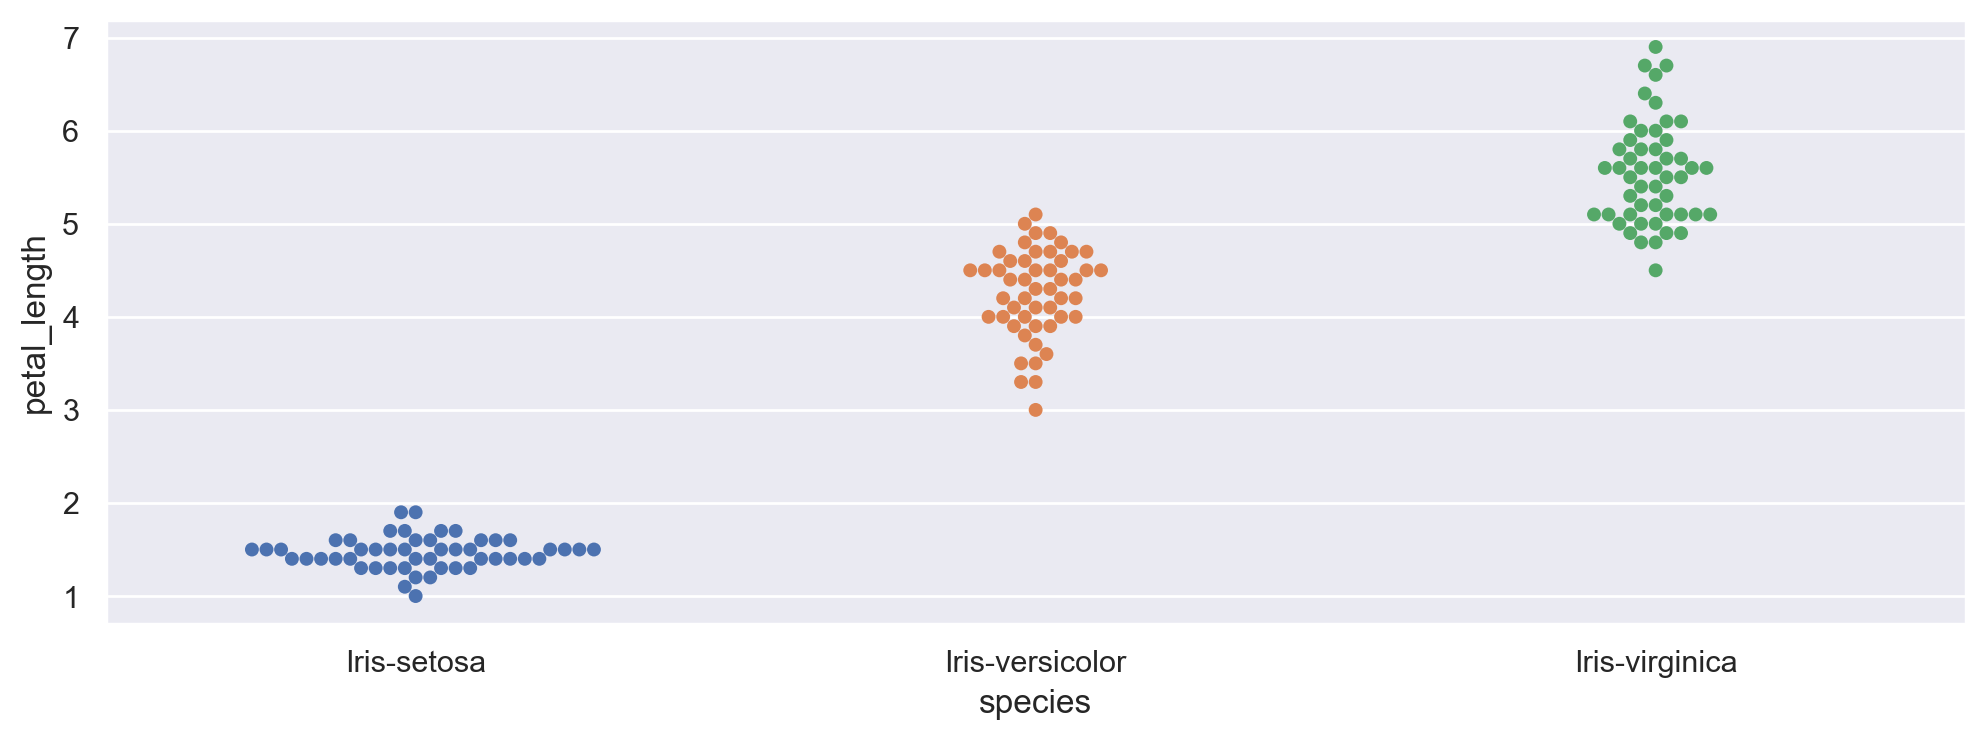

In [57]:
sns.set(rc={'figure.figsize':(12,4)})
_ = sns.swarmplot(data=df, x = "species", y ="petal_length")
plt.gcf().set_dpi(200);

## ECDF (Empirical Cumulative Distribution Function) Plot

- An ECDF is an estimator of the Cumulative Distribution Function. 
- The ECDF essentially allows you to plot a feature of your data in order from least to greatest
- is a step function that jumps up by 1/n at each of the n data points

In [50]:
def ecdf(data):
    
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) /(n)

    return x, y

### Plotting Iris Versicolor Data

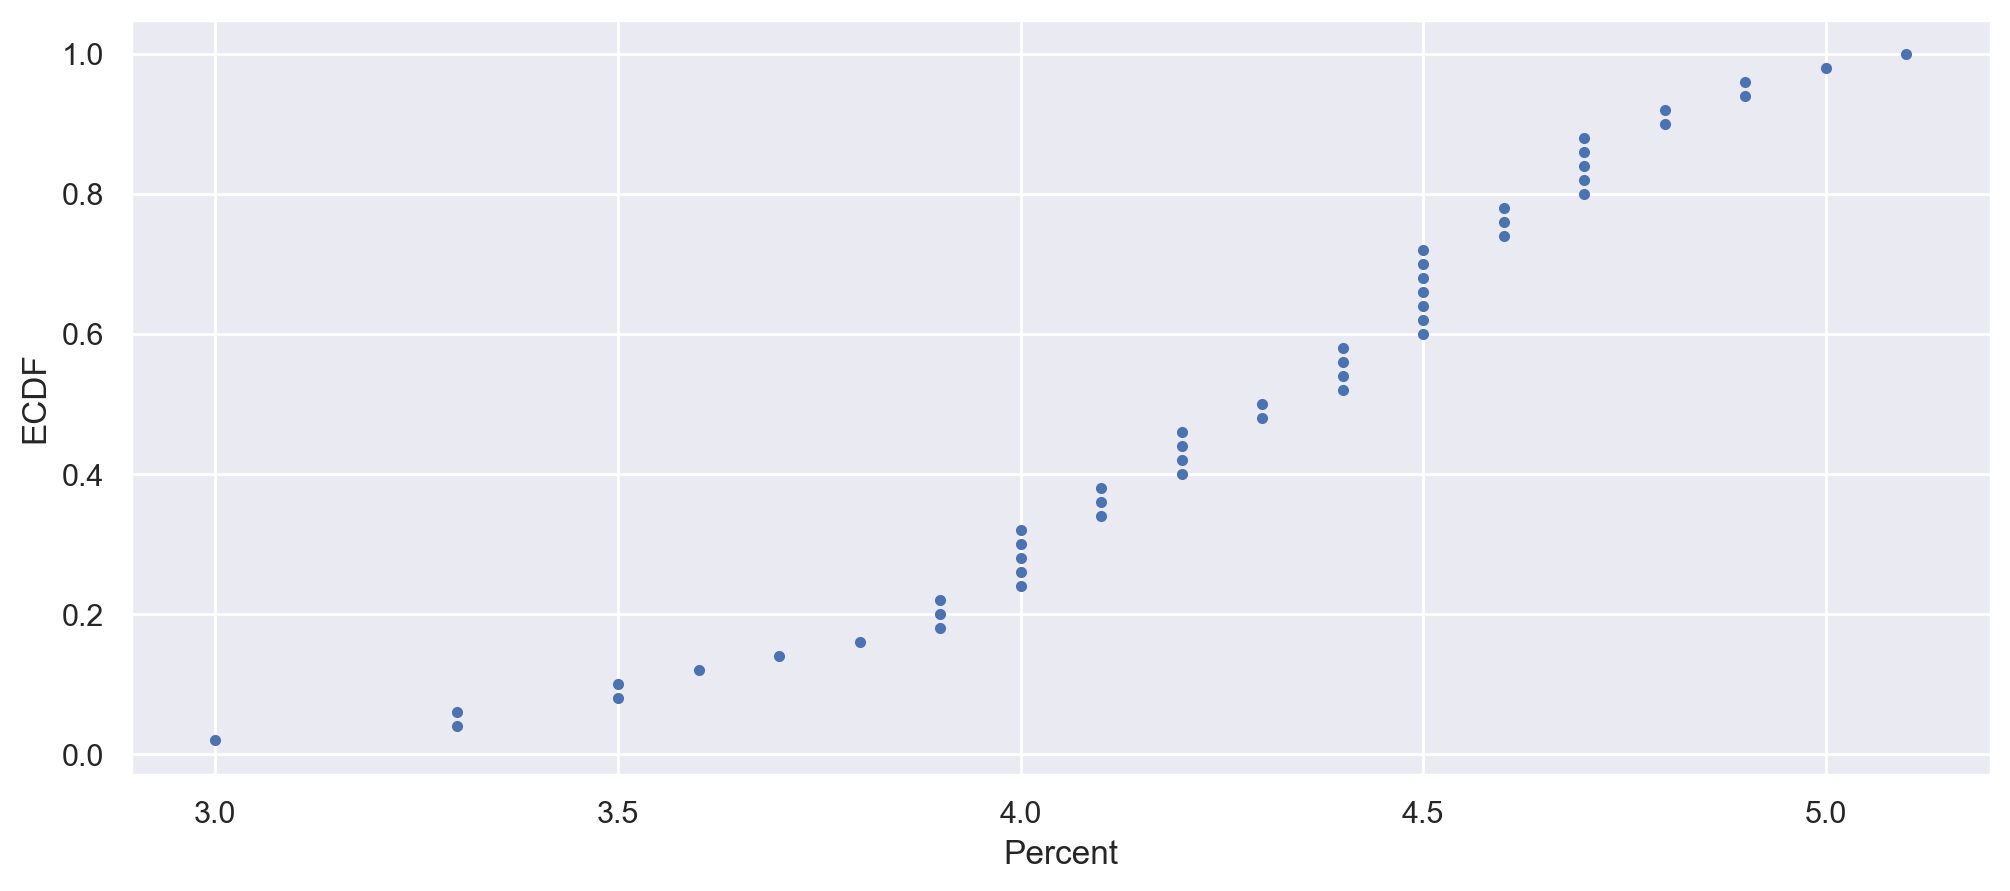

In [51]:
sns.set(rc={'figure.figsize':(12,5)})

x_vers,y_vers = ecdf(versicolor_petal_len)
_ = plt.plot(x_vers,  y_vers, marker= '.', linestyle = 'none')
_ = plt.xlabel("Percent")
_ = plt.ylabel("ECDF")

plt.gcf().set_dpi(200);

### Plotting all iris data

In [52]:
setosa_petal_len = df[df["species"] == 'Iris-setosa']["petal_length"]
virginica_petal_len = df[df["species"] == 'Iris-virginica']["petal_length"]

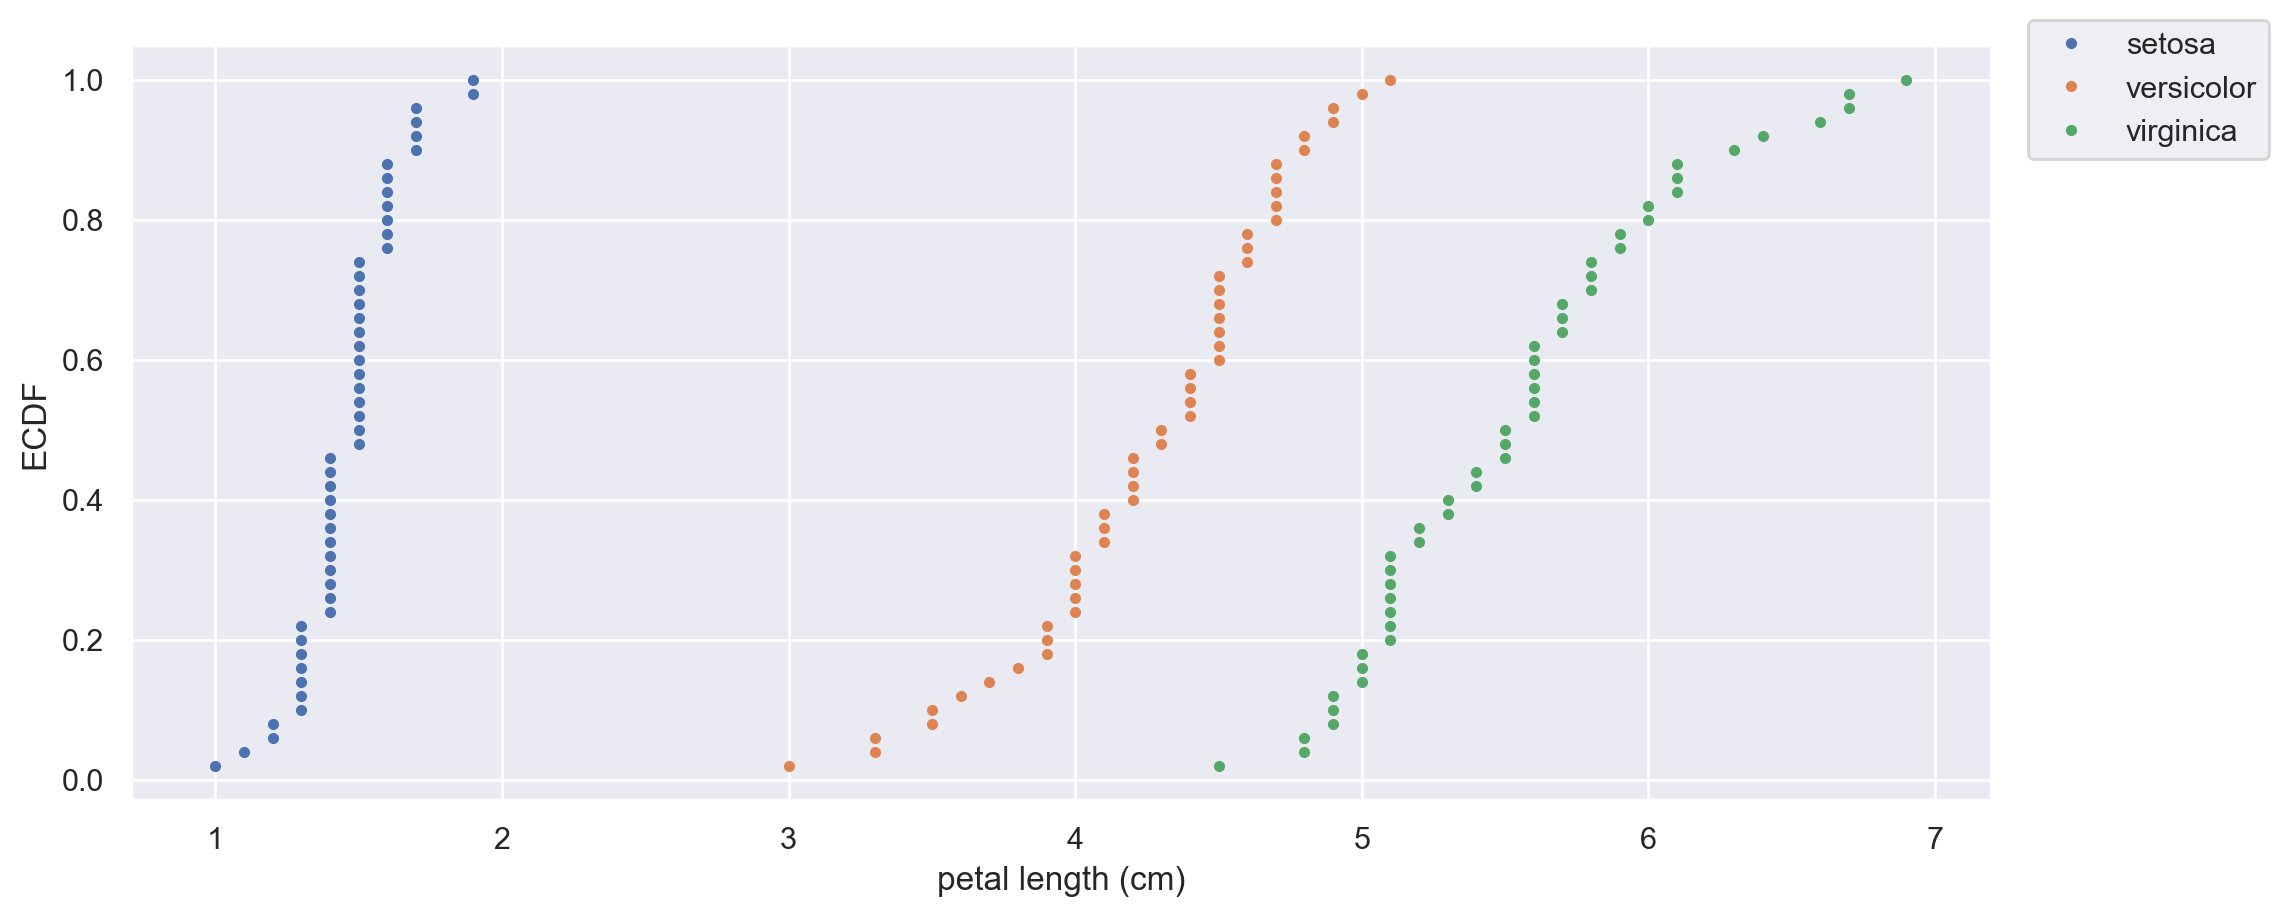

In [56]:
x_set, y_set = ecdf(setosa_petal_len)
x_vers,y_vers = ecdf(versicolor_petal_len)
x_virg, y_virg = ecdf(virginica_petal_len)

_ = plt.plot(x_set, y_set, marker='.', linestyle='none')

_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc=(1.02,0.85))

_ = plt.xlabel('petal length (cm)')

_ = plt.ylabel('ECDF')
plt.gcf().set_dpi(200);

### Takeaways
- Variability of petal length max. seen in Iris virginica
- Shortest petal length and variability seen in Iris versicolor